In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df=shuffle(df)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0


In [5]:
for i in df.index:
    if (df.loc[i].isnull().sum() != 0):
        print('Missing value at ', i)
print('Done!')

Done!


In [6]:
df_features=df.drop('target',axis=1)

In [7]:
df_target=df['target']

In [8]:
X_train_all,X_test_all,y_train_all,y_test_all = train_test_split(df_features,df_target,test_size=0.20,random_state=42)

In [9]:
X_train_all.shape

(242, 13)

In [10]:
X_test_all.shape

(61, 13)

In [11]:

model = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu, input_shape=[len(X_train_all.keys())]),
    keras.layers.Dense(600, activation=tf.nn.relu),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

W0614 13:12:16.406955 140007516366656 deprecation.py:506] From /home/alton/tensorflow/tf/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['accuracy'])

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               7000      
_________________________________________________________________
dense_1 (Dense)              (None, 600)               300600    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 608,601
Trainable params: 608,601
Non-trainable params: 0
_________________________________________________________________


In [14]:
model1=model.fit(X_train_all,y_train_all,epochs=1000,batch_size=50)



W0614 13:12:17.214861 140007516366656 deprecation.py:323] From /home/alton/tensorflow/tf/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1000
242/242 [==============================] - 0s 818us/sample - loss: 8.2224 - acc: 0.4669
Epoch 2/1000
242/242 [==============================] - 0s 187us/sample - loss: 8.2224 - acc: 0.4669
Epoch 3/1000
242/242 [==============================] - 0s 124us/sample - loss: 8.2224 - acc: 0.4669
Epoch 4/1000
242/242 [==============================] - 0s 140us/sample - loss: 8.2224 - acc: 0.4669
Epoch 5/1000
242/242 [==============================] - 0s 134us/sample - loss: 8.2224 - acc: 0.4669
Epoch 6/1000
242/242 [==============================] - 0s 161us/sample - loss: 8.2224 - acc: 0.4669
Epoch 7/1000
242/242 [==============================] - 0s 159us/sample - loss: 8.2224 - acc: 0.4669
Epoch 8/1000
242/242 [==============================] - 0s 153us/sample - loss: 8.2224 - acc: 0.4669
Epoch 9/1000
242/242 [==============================] - 0s 147us/sample - loss: 8.2224 - acc: 0.4669
Epoch 10/1000
242/242 [==============================] - 0s 162us/sample - loss: 8.2224 - a

242/242 [==============================] - 0s 164us/sample - loss: 8.2224 - acc: 0.4669
Epoch 82/1000
242/242 [==============================] - 0s 189us/sample - loss: 8.2224 - acc: 0.4669
Epoch 83/1000
242/242 [==============================] - 0s 170us/sample - loss: 8.2224 - acc: 0.4669
Epoch 84/1000
242/242 [==============================] - 0s 167us/sample - loss: 8.2224 - acc: 0.4669
Epoch 85/1000
242/242 [==============================] - 0s 160us/sample - loss: 8.2224 - acc: 0.4669
Epoch 86/1000
242/242 [==============================] - 0s 148us/sample - loss: 8.2224 - acc: 0.4669
Epoch 87/1000
242/242 [==============================] - 0s 127us/sample - loss: 8.2224 - acc: 0.4669
Epoch 88/1000
242/242 [==============================] - 0s 130us/sample - loss: 8.2224 - acc: 0.4669
Epoch 89/1000
242/242 [==============================] - 0s 137us/sample - loss: 8.2224 - acc: 0.4669
Epoch 90/1000
242/242 [==============================] - 0s 124us/sample - loss: 8.2224 - acc: 0

242/242 [==============================] - 0s 145us/sample - loss: 8.2224 - acc: 0.4669
Epoch 161/1000
242/242 [==============================] - 0s 133us/sample - loss: 8.2224 - acc: 0.4669
Epoch 162/1000
242/242 [==============================] - 0s 132us/sample - loss: 8.2224 - acc: 0.4669
Epoch 163/1000
242/242 [==============================] - 0s 136us/sample - loss: 8.2224 - acc: 0.4669
Epoch 164/1000
242/242 [==============================] - 0s 142us/sample - loss: 8.2224 - acc: 0.4669
Epoch 165/1000
242/242 [==============================] - 0s 138us/sample - loss: 8.2224 - acc: 0.4669
Epoch 166/1000
242/242 [==============================] - 0s 136us/sample - loss: 8.2224 - acc: 0.4669
Epoch 167/1000
242/242 [==============================] - 0s 128us/sample - loss: 8.2224 - acc: 0.4669
Epoch 168/1000
242/242 [==============================] - 0s 116us/sample - loss: 8.2224 - acc: 0.4669
Epoch 169/1000
242/242 [==============================] - 0s 132us/sample - loss: 8.2224

242/242 [==============================] - 0s 209us/sample - loss: 8.2224 - acc: 0.4669
Epoch 240/1000
242/242 [==============================] - 0s 213us/sample - loss: 8.2224 - acc: 0.4669
Epoch 241/1000
242/242 [==============================] - 0s 171us/sample - loss: 8.2224 - acc: 0.4669
Epoch 242/1000
242/242 [==============================] - 0s 149us/sample - loss: 8.2224 - acc: 0.4669
Epoch 243/1000
242/242 [==============================] - 1s 2ms/sample - loss: 8.2224 - acc: 0.4669
Epoch 244/1000
242/242 [==============================] - 0s 123us/sample - loss: 8.2224 - acc: 0.4669
Epoch 245/1000
242/242 [==============================] - 0s 160us/sample - loss: 8.2224 - acc: 0.4669
Epoch 246/1000
242/242 [==============================] - 0s 134us/sample - loss: 8.2224 - acc: 0.4669
Epoch 247/1000
242/242 [==============================] - 0s 128us/sample - loss: 8.2224 - acc: 0.4669
Epoch 248/1000
242/242 [==============================] - 0s 123us/sample - loss: 8.2224 -

242/242 [==============================] - 0s 103us/sample - loss: 8.2224 - acc: 0.4669
Epoch 319/1000
242/242 [==============================] - 0s 109us/sample - loss: 8.2224 - acc: 0.4669
Epoch 320/1000
242/242 [==============================] - 0s 103us/sample - loss: 8.2224 - acc: 0.4669
Epoch 321/1000
242/242 [==============================] - 1s 2ms/sample - loss: 8.2224 - acc: 0.4669
Epoch 322/1000
242/242 [==============================] - 0s 132us/sample - loss: 8.2224 - acc: 0.4669
Epoch 323/1000
242/242 [==============================] - 0s 131us/sample - loss: 8.2224 - acc: 0.4669
Epoch 324/1000
242/242 [==============================] - 0s 114us/sample - loss: 8.2224 - acc: 0.4669
Epoch 325/1000
242/242 [==============================] - 0s 123us/sample - loss: 8.2224 - acc: 0.4669
Epoch 326/1000
242/242 [==============================] - 0s 112us/sample - loss: 8.2224 - acc: 0.4669
Epoch 327/1000
242/242 [==============================] - 0s 100us/sample - loss: 8.2224 -

242/242 [==============================] - 0s 120us/sample - loss: 8.2224 - acc: 0.4669
Epoch 398/1000
242/242 [==============================] - 0s 112us/sample - loss: 8.2224 - acc: 0.4669
Epoch 399/1000
242/242 [==============================] - 0s 110us/sample - loss: 8.2224 - acc: 0.4669
Epoch 400/1000
242/242 [==============================] - 0s 121us/sample - loss: 8.2224 - acc: 0.4669
Epoch 401/1000
242/242 [==============================] - 0s 185us/sample - loss: 8.2224 - acc: 0.4669
Epoch 402/1000
242/242 [==============================] - 0s 184us/sample - loss: 8.2224 - acc: 0.4669
Epoch 403/1000
242/242 [==============================] - 0s 140us/sample - loss: 8.2224 - acc: 0.4669
Epoch 404/1000
242/242 [==============================] - 0s 146us/sample - loss: 8.2224 - acc: 0.4669
Epoch 405/1000
242/242 [==============================] - 0s 199us/sample - loss: 8.2224 - acc: 0.4669
Epoch 406/1000
242/242 [==============================] - 0s 161us/sample - loss: 8.2224

242/242 [==============================] - 0s 114us/sample - loss: 8.2224 - acc: 0.4669
Epoch 477/1000
242/242 [==============================] - 0s 107us/sample - loss: 8.2224 - acc: 0.4669
Epoch 478/1000
242/242 [==============================] - 0s 111us/sample - loss: 8.2224 - acc: 0.4669
Epoch 479/1000
242/242 [==============================] - 0s 108us/sample - loss: 8.2224 - acc: 0.4669
Epoch 480/1000
242/242 [==============================] - 0s 102us/sample - loss: 8.2224 - acc: 0.4669
Epoch 481/1000
242/242 [==============================] - 0s 104us/sample - loss: 8.2224 - acc: 0.4669
Epoch 482/1000
242/242 [==============================] - 0s 99us/sample - loss: 8.2224 - acc: 0.4669
Epoch 483/1000
242/242 [==============================] - 0s 104us/sample - loss: 8.2224 - acc: 0.4669
Epoch 484/1000
242/242 [==============================] - 0s 104us/sample - loss: 8.2224 - acc: 0.4669
Epoch 485/1000
242/242 [==============================] - 0s 106us/sample - loss: 8.2224 

242/242 [==============================] - 0s 128us/sample - loss: 8.2224 - acc: 0.4669
Epoch 556/1000
242/242 [==============================] - 0s 124us/sample - loss: 8.2224 - acc: 0.4669
Epoch 557/1000
242/242 [==============================] - 0s 142us/sample - loss: 8.2224 - acc: 0.4669
Epoch 558/1000
242/242 [==============================] - 0s 134us/sample - loss: 8.2224 - acc: 0.4669
Epoch 559/1000
242/242 [==============================] - 0s 129us/sample - loss: 8.2224 - acc: 0.4669
Epoch 560/1000
242/242 [==============================] - 0s 125us/sample - loss: 8.2224 - acc: 0.4669
Epoch 561/1000
242/242 [==============================] - 0s 2ms/sample - loss: 8.2224 - acc: 0.4669
Epoch 562/1000
242/242 [==============================] - 0s 157us/sample - loss: 8.2224 - acc: 0.4669
Epoch 563/1000
242/242 [==============================] - 0s 127us/sample - loss: 8.2224 - acc: 0.4669
Epoch 564/1000
242/242 [==============================] - 0s 124us/sample - loss: 8.2224 -

242/242 [==============================] - 0s 107us/sample - loss: 8.2224 - acc: 0.4669
Epoch 635/1000
242/242 [==============================] - 0s 103us/sample - loss: 8.2224 - acc: 0.4669
Epoch 636/1000
242/242 [==============================] - 0s 103us/sample - loss: 8.2224 - acc: 0.4669
Epoch 637/1000
242/242 [==============================] - 0s 105us/sample - loss: 8.2224 - acc: 0.4669
Epoch 638/1000
242/242 [==============================] - 0s 106us/sample - loss: 8.2224 - acc: 0.4669
Epoch 639/1000
242/242 [==============================] - 0s 105us/sample - loss: 8.2224 - acc: 0.4669
Epoch 640/1000
242/242 [==============================] - 0s 105us/sample - loss: 8.2224 - acc: 0.4669
Epoch 641/1000
242/242 [==============================] - 0s 104us/sample - loss: 8.2224 - acc: 0.4669
Epoch 642/1000
242/242 [==============================] - 0s 125us/sample - loss: 8.2224 - acc: 0.4669
Epoch 643/1000
242/242 [==============================] - 0s 149us/sample - loss: 8.2224

242/242 [==============================] - 0s 138us/sample - loss: 8.2224 - acc: 0.4669
Epoch 714/1000
242/242 [==============================] - 0s 138us/sample - loss: 8.2224 - acc: 0.4669
Epoch 715/1000
242/242 [==============================] - 0s 116us/sample - loss: 8.2224 - acc: 0.4669
Epoch 716/1000
242/242 [==============================] - 0s 126us/sample - loss: 8.2224 - acc: 0.4669
Epoch 717/1000
242/242 [==============================] - 0s 132us/sample - loss: 8.2224 - acc: 0.4669
Epoch 718/1000
242/242 [==============================] - 0s 124us/sample - loss: 8.2224 - acc: 0.4669
Epoch 719/1000
242/242 [==============================] - 0s 154us/sample - loss: 8.2224 - acc: 0.4669
Epoch 720/1000
242/242 [==============================] - 0s 138us/sample - loss: 8.2224 - acc: 0.4669
Epoch 721/1000
242/242 [==============================] - 0s 136us/sample - loss: 8.2224 - acc: 0.4669
Epoch 722/1000
242/242 [==============================] - 0s 158us/sample - loss: 8.2224

242/242 [==============================] - 0s 115us/sample - loss: 8.2224 - acc: 0.4669
Epoch 793/1000
242/242 [==============================] - 0s 112us/sample - loss: 8.2224 - acc: 0.4669
Epoch 794/1000
242/242 [==============================] - 0s 120us/sample - loss: 8.2224 - acc: 0.4669
Epoch 795/1000
242/242 [==============================] - 0s 112us/sample - loss: 8.2224 - acc: 0.4669
Epoch 796/1000
242/242 [==============================] - 0s 115us/sample - loss: 8.2224 - acc: 0.4669
Epoch 797/1000
242/242 [==============================] - 0s 110us/sample - loss: 8.2224 - acc: 0.4669
Epoch 798/1000
242/242 [==============================] - 0s 108us/sample - loss: 8.2224 - acc: 0.4669
Epoch 799/1000
242/242 [==============================] - 0s 108us/sample - loss: 8.2224 - acc: 0.4669
Epoch 800/1000
242/242 [==============================] - 0s 104us/sample - loss: 8.2224 - acc: 0.4669
Epoch 801/1000
242/242 [==============================] - 0s 104us/sample - loss: 8.2224

242/242 [==============================] - 0s 146us/sample - loss: 8.2224 - acc: 0.4669
Epoch 872/1000
242/242 [==============================] - 0s 179us/sample - loss: 8.2224 - acc: 0.4669
Epoch 873/1000
242/242 [==============================] - 0s 139us/sample - loss: 8.2224 - acc: 0.4669
Epoch 874/1000
242/242 [==============================] - 0s 137us/sample - loss: 8.2224 - acc: 0.4669
Epoch 875/1000
242/242 [==============================] - 0s 148us/sample - loss: 8.2224 - acc: 0.4669
Epoch 876/1000
242/242 [==============================] - 0s 166us/sample - loss: 8.2224 - acc: 0.4669
Epoch 877/1000
242/242 [==============================] - 0s 139us/sample - loss: 8.2224 - acc: 0.4669
Epoch 878/1000
242/242 [==============================] - 0s 131us/sample - loss: 8.2224 - acc: 0.4669
Epoch 879/1000
242/242 [==============================] - 0s 127us/sample - loss: 8.2224 - acc: 0.4669
Epoch 880/1000
242/242 [==============================] - 0s 154us/sample - loss: 8.2224

242/242 [==============================] - 0s 127us/sample - loss: 8.2224 - acc: 0.4669
Epoch 951/1000
242/242 [==============================] - 0s 140us/sample - loss: 8.2224 - acc: 0.4669
Epoch 952/1000
242/242 [==============================] - 0s 151us/sample - loss: 8.2224 - acc: 0.4669
Epoch 953/1000
242/242 [==============================] - 0s 140us/sample - loss: 8.2224 - acc: 0.4669
Epoch 954/1000
242/242 [==============================] - 0s 139us/sample - loss: 8.2224 - acc: 0.4669
Epoch 955/1000
242/242 [==============================] - 0s 141us/sample - loss: 8.2224 - acc: 0.4669
Epoch 956/1000
242/242 [==============================] - 0s 135us/sample - loss: 8.2224 - acc: 0.4669
Epoch 957/1000
242/242 [==============================] - 0s 131us/sample - loss: 8.2224 - acc: 0.4669
Epoch 958/1000
242/242 [==============================] - 0s 124us/sample - loss: 8.2224 - acc: 0.4669
Epoch 959/1000
242/242 [==============================] - 0s 121us/sample - loss: 8.2224

In [15]:
model2=model.evaluate(x=X_test_all,y=y_test_all)

61/61 [==============================] - 0s 625us/sample - loss: 8.8504 - acc: 0.4262


In [16]:
model2

[8.850380537939854, 0.4262295]

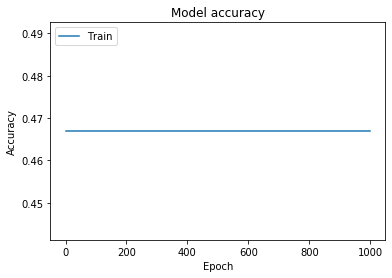

AttributeError: 'list' object has no attribute 'history'

In [17]:
import matplotlib.pyplot as plt
plt.plot(model1.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model2.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()